<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Tarefa1_ClassificacaoBinaria_Cluster3d_Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 1 - Classificação Binária - Cluster 3D [Solução]

Utilizaremos um dataset sintético balanceado com duas classes, agora em 3 dimensões.

Vamos comparar o desempenho da regressão logística, das SVM e uma rede neural de camada simples.

In [1]:
!wget https://raw.githubusercontent.com/jsansao/idl/main/cluster_data.csv
!wget https://raw.githubusercontent.com/jsansao/idl/main/cluster_label.csv



from numpy import genfromtxt
cluster_data = genfromtxt('cluster_data.csv', delimiter=',')
cluster_label = genfromtxt('cluster_label.csv', delimiter=',')


--2025-10-09 19:18:44--  https://raw.githubusercontent.com/jsansao/idl/main/cluster_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2269907 (2.2M) [text/plain]
Saving to: ‘cluster_data.csv’

cluster_data.csv    100%[===================>]   2.16M  --.-KB/s    in 0.07s   

2025-10-09 19:18:44 (30.1 MB/s) - ‘cluster_data.csv’ saved [2269907/2269907]

--2025-10-09 19:18:44--  https://raw.githubusercontent.com/jsansao/idl/main/cluster_label.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80000 (78K) [text/plain]
Saving to:

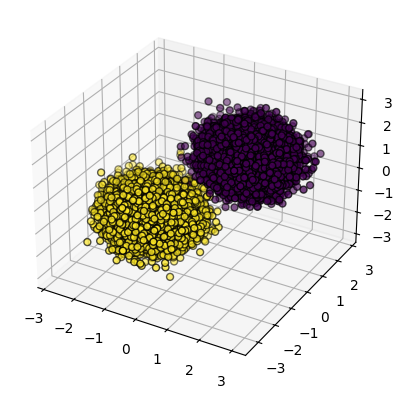

In [2]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], marker="o", c= cluster_label, s=25, edgecolor="k")
plt.show()


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(cluster_data, cluster_label)



## Questões:

1. Determine os coeficientes de regressão logística e acurácia do classificador, para os dados de treinamento e teste.
2. Execute o mesmo treinamento de uma SVM.
3. Idem para uma rede neural de uma única camada.


## Regressão Logística


In [4]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)


log_reg.intercept_,log_reg.coef_




(array([-0.11868377]), array([[-4.67661014, -4.26272782, -4.40086264]]))

In [5]:


 from sklearn.metrics import accuracy_score

 y_pred = log_reg.predict(X_test)

 accuracy_score(y_test, y_pred)



0.9995

## SVM



In [6]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=0.1)
svm_clf.fit(X_train, y_train)


y_pred = svm_clf.predict(X_test)


svm_clf.intercept_, svm_clf.coef_

(array([-0.01957681]), array([[-1.47152388, -1.44744692, -1.50614241]]))

In [7]:
accuracy_score(y_test, y_pred)


0.9997

## Rede neural monocamada

In [8]:

import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[3])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))



model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3830 - loss: 0.3953 - val_accuracy: 0.9992 - val_loss: 0.0289
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9995 - loss: 0.0227 - val_accuracy: 0.9996 - val_loss: 0.0135
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9995 - loss: 0.0120 - val_accuracy: 0.9997 - val_loss: 0.0092
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0086 - val_accuracy: 0.9997 - val_loss: 0.0071
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0067 - val_accuracy: 0.9997 - val_loss: 0.0059
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 0.0056 - val_accuracy: 0.9998 - val_loss: 0.0051
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9997 - loss: 0.0050 - val_accuracy: 0.9998 - val_loss: 0.0045
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 0.0044 - val_accuracy: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

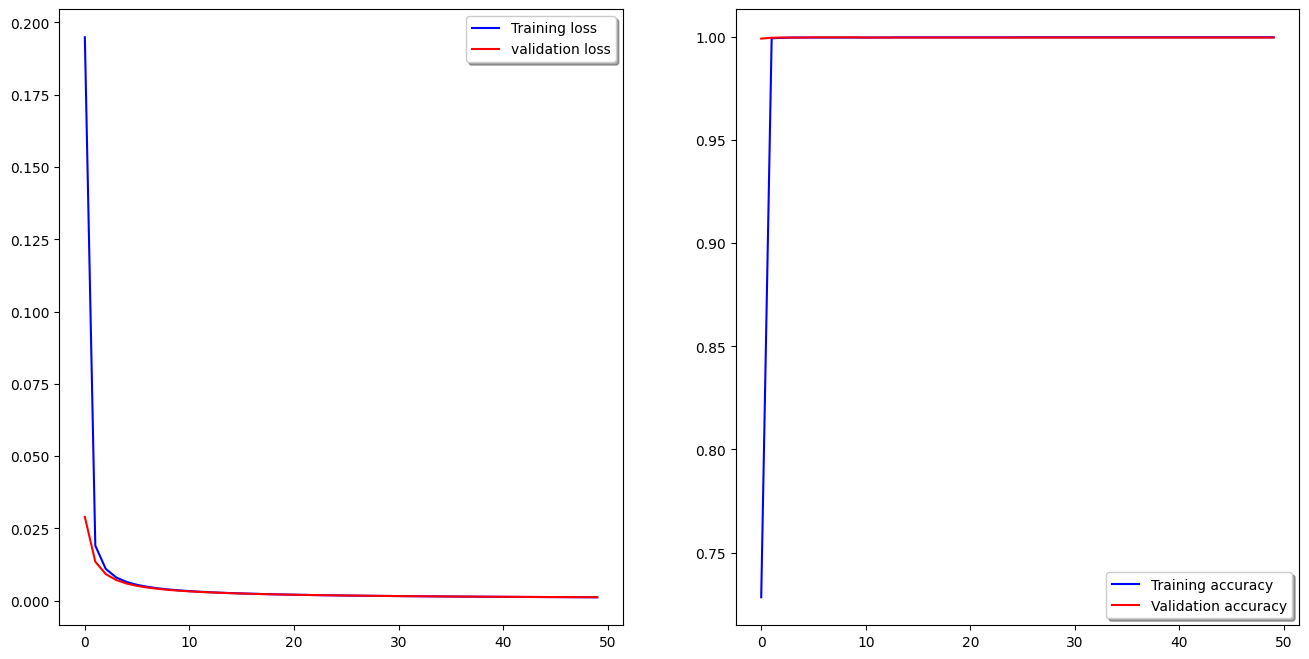

In [11]:


fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



